In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

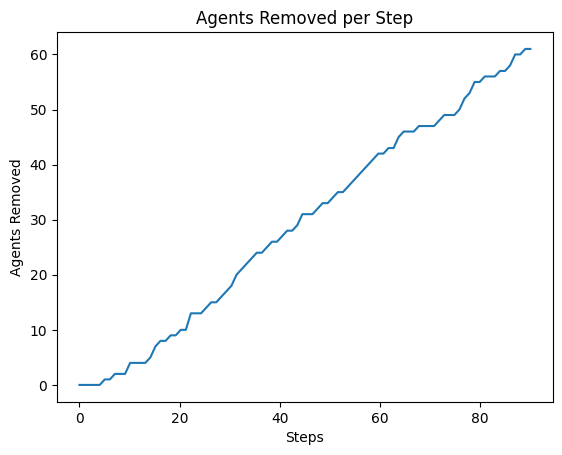

In [12]:
# Load the data from the CSV file
data = pd.read_csv("agents_removed_per_step.csv")

# prepare the data for plotting
steps = np.linspace(0, len(data), len(data))

# visualize the data
plt.plot(steps, data["Agents Removed"])
plt.xlabel("Steps")
plt.ylabel("Agents Removed")
plt.title("Agents Removed per Step")
plt.show()

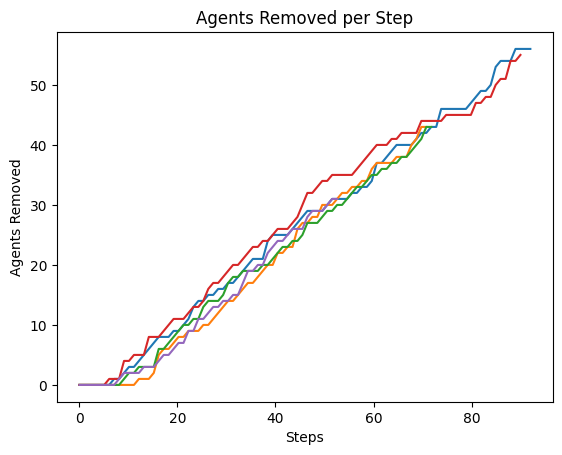

In [16]:
# Load the data from the CSV file
data = pd.read_csv("agents_removed_per_step_all_runs.csv")

for i in range(len(data.columns)):
    # prepare the data for plotting taking column i
    steps = np.linspace(0, len(data.iloc[:, i]), len(data.iloc[:, i]))

    # visualize the data
    plt.plot(steps, data.iloc[:, i])

plt.xlabel("Steps")
plt.ylabel("Agents Removed")
plt.title("Agents Removed per Step")
    
plt.show()

In [1]:
from IPython.display import clear_output
import SALib
clear_output()
print("Everything imported!")

Everything imported!


In [2]:
%matplotlib inline
from SALib.sample import saltelli
from wolf_sheep.model import WolfSheep
from wolf_sheep.agents import Wolf, Sheep
from mesa.batchrunner import FixedBatchRunner
# from mesa.batchrunner import BatchRunnerMP
from SALib.analyze import sobol
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from model import CrowdModel, portrayal

KeyboardInterrupt: 

In [ ]:
# We define our variables and bounds
problem = {
    'num_vars': 3,
    'names': ['sheep_reproduce', 'wolf_reproduce', 'wolf_gain_from_food'],
    'bounds': [[0.01, 0.1], [0.01, 0.1], [5, 30]]
}

# Set the repetitions, the amount of steps, and the amount of distinct values per variable
replicates = 30
max_steps = 100
distinct_samples = 30 

# Set the outputs
model_reporters = {"Wolves": lambda m: m.schedule.get_breed_count(Wolf),
             "Sheep": lambda m: m.schedule.get_breed_count(Sheep)}

data = {}

for i, var in enumerate(problem['names']):
    # Get the bounds for this variable and get <distinct_samples> samples within this space (uniform)
    samples = np.linspace(*problem['bounds'][i], num=distinct_samples)
    
    # Keep in mind that wolf_gain_from_food should be integers. You will have to change
    # your code to acommodate for this or sample in such a way that you only get integers.
    if var == 'wolf_gain_from_food':
        samples = np.linspace(*problem['bounds'][i], num=distinct_samples, dtype=int)
    
    batch = FixedBatchRunner(WolfSheep,
                        max_steps=max_steps,
                        iterations=replicates,
                        parameters_list=[{var: value} for value in samples],
                        fixed_parameters= None,
                        model_reporters=model_reporters,
                        display_progress=True)
    
    batch.run_all()
    
    data[var] = batch.get_model_vars_dataframe()
    